# CX SCORE CALCULATION

In [7]:
import pandas as pd
import os
import cx_algorithm as cx
import structure_validation
import structural_analysis
import importlib

## RUN ON ENVIRONMENT WITH WORKING PROINTVAR

In [16]:
importlib.reload(cx)

<module 'cx_algorithm' from '/homes/2394007/cx_algorithm.py'>

In [3]:
df_allsp = pd.read_csv("/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.varalign/prointvar_analysis_data/anks_final_aln.sto_prointvar_structure_table_with_validation.csv")

2020-06-08 14:17:10,572 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,14,15,18,19,25,26,28,29,31,32,33,41,42,43,44,45,46,47,48,51,52,63,65,67,69,71,75,77,90,91,95,113,114,115,118,119,122,123,128,129,132,133,142,143,149,151,153,154,155,156,157,161,163,169,206,208,226,227,228,229,230,239,269,272,276,278,279,283,299,300,303,307,309,310) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



In [4]:
df_allsp_rsrz_filt = structure_validation.filter_rsrz_rscc(df_allsp) #191617 

In [5]:
print(df_allsp_rsrz_filt.validation_rscc_A.mean())
print(df_allsp_rsrz_filt.validation_rscc_B.mean())
print(df_allsp_rsrz_filt.validation_rsrz_A.mean())
print(df_allsp_rsrz_filt.validation_rsrz_B.mean())
print(df_allsp_rsrz_filt.resolution_A.median())

0.9595302921974563
0.9563154052093497
-0.12076639859720172
-0.13901986775703618
2.3


In [6]:
pdb_dir = '/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx'
pdb_split_dir = os.path.join(pdb_dir, 'split')
cx.split_pdb_files(df_allsp_rsrz_filt, pdb_dir, pdb_split_dir)
pdb_files = os.listdir(pdb_split_dir)
pdb_files = [os.path.join(pdb_split_dir, pdb_file) for pdb_file in pdb_files]
csv_dir = os.path.join(pdb_dir, "cx_csvs")
out_df = os.path.join(csv_dir, "allsp_cx_def.csv")
cx_all_strucs_sorted = cx.get_cx_df(df_allsp_rsrz_filt, csv_dir, pdb_files, out_df, r = 20)
df_allsp_rsrz_filt_un = df_allsp_rsrz_filt.drop_duplicates(['UniProt_dbAccessionId_A', 'PDB_dbAccessionId_A', 'PDB_dbChainId_A', 'PDB_dbResNum_A'])
merged = cx.merge_with_cx(df_allsp_rsrz_filt_un, cx_all_strucs_sorted)
cons_cols_allsp = structural_analysis.get_cons_cols('/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/anks_final_aln.sto', 'stockholm')
merged.Alignment_column_A = merged.Alignment_column_A.astype(float).astype(int)
merged_cons = merged[merged.Alignment_column_A.isin(cons_cols_allsp)]
merged_cons.res_cx_median = merged_cons.res_cx_median.astype(float)
merged_cons.res_cx_min = merged_cons.res_cx_min.astype(float)
merged_cons.res_cx_mean = merged_cons.res_cx_mean.astype(float)
merged_cons.res_cx_max = merged_cons.res_cx_max.astype(float)
merged_cons.to_csv('/cluster/gjb_lab/2394007/merged_cons_final.csv', index = False)

2020-06-08 14:17:15,011 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16951.
  PDBConstructionWarning)

2020-06-08 14:17:15,013 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16975.
  PDBConstructionWarning)

2020-06-08 14:17:15,014 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16999.
  PDBConstructionWarning)

2020-06-08 14:17:15,016 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3w9f_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3w9f_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3w9f_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3w9f_D.ent already available!


2020-06-08 14:17:15,372 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16991.
  PDBConstructionWarning)

2020-06-08 14:17:15,379 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17196.
  PDBConstructionWarning)

2020-06-08 14:17:15,386 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17428.
  PDBConstructionWarning)

2020-06-08 14:17:15,394 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3w9g_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3w9g_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3w9g_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3w9g_D.ent already available!


2020-06-08 14:17:15,604 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9252.
  PDBConstructionWarning)

2020-06-08 14:17:15,610 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9430.
  PDBConstructionWarning)

2020-06-08 14:17:15,614 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9554.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3jxi_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3jxi_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3jxi_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3jxi_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3jxj_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3jxj_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3jxj_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3jxj_D.ent already available!


2020-06-08 14:17:16,189 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22684.
  PDBConstructionWarning)

2020-06-08 14:17:16,212 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23638.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4cj9_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4cj9_B.ent already available!


2020-06-08 14:17:16,618 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22261.
  PDBConstructionWarning)

2020-06-08 14:17:16,620 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22280.
  PDBConstructionWarning)

2020-06-08 14:17:16,621 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22306.
  PDBConstructionWarning)

2020-06-08 14:17:16,693 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5d68_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5d68_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5d68_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3v30_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3v30_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6mew_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6mew_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6mew_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:16,839 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3226.
  PDBConstructionWarning)

2020-06-08 14:17:16,840 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/Atom.py:189: PDBConstructionWarning: Could not assign element 'UNK' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)

2020-06-08 14:17:16,846 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3443.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3uxg_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3uxg_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3ui2_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3ui2_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3deo_A.ent already available!


2020-06-08 14:17:17,129 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1895.
  PDBConstructionWarning)

2020-06-08 14:17:17,250 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8022.
  PDBConstructionWarning)

2020-06-08 14:17:17,251 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8028.
  PDBConstructionWarning)

2020-06-08 14:17:17,252 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3dep_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3dep_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5e4w_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5e4w_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5e4w_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5e4w_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5e4w_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5e4w_F.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:17,402 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6451.
  PDBConstructionWarning)

2020-06-08 14:17:17,407 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6626.
  PDBConstructionWarning)

2020-06-08 14:17:17,545 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7369.
  PDBConstructionWarning)

2020-06-08 14:17:17,621 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6hc8_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6hc8_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1uoh_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4nik_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4nik_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1qym_A.ent already available!


2020-06-08 14:17:18,088 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19809.
  PDBConstructionWarning)

2020-06-08 14:17:18,090 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19844.
  PDBConstructionWarning)

2020-06-08 14:17:18,092 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 19879.
  PDBConstructionWarning)

2020-06-08 14:17:18,152 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5uqe_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5uqe_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5uqe_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5uqe_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5uqe_F.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5u0i_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5u0i_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5u0j_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:18,932 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30449.
  PDBConstructionWarning)

2020-06-08 14:17:18,934 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 30461.
  PDBConstructionWarning)

2020-06-08 14:17:18,935 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 30466.
  PDBConstructionWarning)

2020-06-08 14:17:18,936 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5jhq_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5jhq_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5jhq_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5jhq_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5jhq_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5jhq_F.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5jhq_G.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5jhq_H.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:19,151 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5287.
  PDBConstructionWarning)

2020-06-08 14:17:19,153 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5288.
  PDBConstructionWarning)

2020-06-08 14:17:19,153 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5289.
  PDBConstructionWarning)

2020-06-08 14:17:19,154 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1ot8_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1ot8_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1ot8_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2fo1_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2fo1_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2fo1_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2fo1_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2fo1_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:19,550 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5359.
  PDBConstructionWarning)

2020-06-08 14:17:19,554 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5448.
  PDBConstructionWarning)

2020-06-08 14:17:19,556 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5501.
  PDBConstructionWarning)

2020-06-08 14:17:19,715 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1ikn_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1ikn_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1ikn_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5h2c_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5h2c_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5h28_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1ihb_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1ihb_B.ent already available!


2020-06-08 14:17:20,183 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6917.
  PDBConstructionWarning)

2020-06-08 14:17:20,184 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 6921.
  PDBConstructionWarning)

2020-06-08 14:17:20,185 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 6925.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6py8_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6py8_G.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6py8_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6py8_X.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6py8_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6py8_Y.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6py8_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6py8_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:20,694 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3576.
  PDBConstructionWarning)

2020-06-08 14:17:20,700 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3827.
  PDBConstructionWarning)

2020-06-08 14:17:20,756 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3542.
  PDBConstructionWarning)

2020-06-08 14:17:20,763 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2he0_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2he0_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1yyh_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1yyh_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2f8y_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2f8y_B.ent already available!


2020-06-08 14:17:21,121 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5619.
  PDBConstructionWarning)

2020-06-08 14:17:21,122 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5627.
  PDBConstructionWarning)

2020-06-08 14:17:21,126 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5773.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4bsz_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4bsz_B.ent already available!


2020-06-08 14:17:21,130 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5914.
  PDBConstructionWarning)

2020-06-08 14:17:21,181 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3312.
  PDBConstructionWarning)

2020-06-08 14:17:21,181 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3313.
  PDBConstructionWarning)

2020-06-08 14:17:21,182 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3aaa_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3aaa_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3aaa_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1awc_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1awc_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1awc_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1awc_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4ot9_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:21,858 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12896.
  PDBConstructionWarning)

2020-06-08 14:17:21,862 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13033.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5y4f_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5y4f_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4rly_A.ent already available!


2020-06-08 14:17:22,134 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7678.
  PDBConstructionWarning)

2020-06-08 14:17:22,136 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7730.
  PDBConstructionWarning)

2020-06-08 14:17:22,137 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7780.
  PDBConstructionWarning)

2020-06-08 14:17:22,139 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5y4e_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5y4e_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2qc9_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2qc9_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3p3n_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3p3n_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3p3p_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3p3p_B.ent already available!


2020-06-08 14:17:22,489 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7104.
  PDBConstructionWarning)

2020-06-08 14:17:22,492 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7174.
  PDBConstructionWarning)

2020-06-08 14:17:22,493 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7204.
  PDBConstructionWarning)

2020-06-08 14:17:22,499 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6jd6_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6jd6_B.ent already available!


2020-06-08 14:17:22,855 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23013.
  PDBConstructionWarning)

2020-06-08 14:17:22,857 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23079.
  PDBConstructionWarning)

2020-06-08 14:17:22,860 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23211.
  PDBConstructionWarning)

2020-06-08 14:17:22,870 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4oav_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4oav_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4oav_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4oav_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4oau_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4oau_A.ent already available!


2020-06-08 14:17:23,281 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9636.
  PDBConstructionWarning)

2020-06-08 14:17:23,285 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9776.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4g8k_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4g8k_B.ent already available!


2020-06-08 14:17:23,749 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19078.
  PDBConstructionWarning)

2020-06-08 14:17:23,752 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19212.
  PDBConstructionWarning)

2020-06-08 14:17:23,755 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19346.
  PDBConstructionWarning)

2020-06-08 14:17:23,758 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4g8l_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4g8l_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4g8l_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4g8l_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4hi8_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4hi8_B.ent already available!


2020-06-08 14:17:24,069 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6382.
  PDBConstructionWarning)

2020-06-08 14:17:24,071 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6408.
  PDBConstructionWarning)

2020-06-08 14:17:24,072 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6416.
  PDBConstructionWarning)

2020-06-08 14:17:24,081 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4hi9_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4hi9_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3f6q_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3f6q_B.ent already available!


2020-06-08 14:17:24,377 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2448.
  PDBConstructionWarning)

2020-06-08 14:17:24,387 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2711.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3ixe_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3ixe_B.ent already available!


2020-06-08 14:17:24,853 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20065.
  PDBConstructionWarning)

2020-06-08 14:17:24,855 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20087.
  PDBConstructionWarning)

2020-06-08 14:17:24,856 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 20088.
  PDBConstructionWarning)

2020-06-08 14:17:24,857 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain I is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4a63_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4a63_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4a63_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4a63_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4a63_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4a63_F.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4a63_G.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4a63_H.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:25,210 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16927.
  PDBConstructionWarning)

2020-06-08 14:17:25,212 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16997.
  PDBConstructionWarning)

2020-06-08 14:17:25,214 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17060.
  PDBConstructionWarning)

2020-06-08 14:17:25,215 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6ghm_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6ghm_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6ghm_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6ghm_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5ybu_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5ybu_B.ent already available!


2020-06-08 14:17:25,598 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8467.
  PDBConstructionWarning)

2020-06-08 14:17:25,600 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8489.
  PDBConstructionWarning)

2020-06-08 14:17:25,600 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8496.
  PDBConstructionWarning)

2020-06-08 14:17:25,604 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5ybj_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3jue_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3jue_B.ent already available!


2020-06-08 14:17:25,774 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9097.
  PDBConstructionWarning)

2020-06-08 14:17:25,775 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9109.
  PDBConstructionWarning)

2020-06-08 14:17:25,775 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9121.
  PDBConstructionWarning)

2020-06-08 14:17:25,782 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3t9k_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3t9k_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4f1p_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4f1p_B.ent already available!


2020-06-08 14:17:26,122 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6016.
  PDBConstructionWarning)

2020-06-08 14:17:26,128 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6207.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6if3_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6if3_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5aar_A.ent already available!


2020-06-08 14:17:26,450 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11833.
  PDBConstructionWarning)

2020-06-08 14:17:26,452 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11866.
  PDBConstructionWarning)

2020-06-08 14:17:26,453 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11899.
  PDBConstructionWarning)

2020-06-08 14:17:26,455 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain F is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyk_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyk_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyk_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyk_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyk_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyk_F.ent already available!


2020-06-08 14:17:26,857 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 17325.
  PDBConstructionWarning)

2020-06-08 14:17:26,859 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 17358.
  PDBConstructionWarning)

2020-06-08 14:17:26,860 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 17391.
  PDBConstructionWarning)

2020-06-08 14:17:26,861 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain E is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyh_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyh_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyh_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyh_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyh_F.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyh_G.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyh_H.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6kyh_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:27,307 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16126.
  PDBConstructionWarning)

2020-06-08 14:17:27,309 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16207.
  PDBConstructionWarning)

2020-06-08 14:17:27,312 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16302.
  PDBConstructionWarning)

2020-06-08 14:17:27,314 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4bet_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4bet_B.ent already available!


2020-06-08 14:17:27,624 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15846.
  PDBConstructionWarning)

2020-06-08 14:17:27,627 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15905.
  PDBConstructionWarning)

2020-06-08 14:17:27,628 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15950.
  PDBConstructionWarning)

2020-06-08 14:17:27,631 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4ber_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4ber_B.ent already available!


2020-06-08 14:17:28,099 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15893.
  PDBConstructionWarning)

2020-06-08 14:17:28,102 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15935.
  PDBConstructionWarning)

2020-06-08 14:17:28,176 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4186.
  PDBConstructionWarning)

2020-06-08 14:17:28,179 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is disco

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4bep_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4bep_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1oy3_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1oy3_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1oy3_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4hbd_A.ent already available!


2020-06-08 14:17:28,513 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8586.
  PDBConstructionWarning)

2020-06-08 14:17:28,515 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8603.
  PDBConstructionWarning)

2020-06-08 14:17:28,516 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8620.
  PDBConstructionWarning)

2020-06-08 14:17:28,520 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5ybv_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5ybv_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5ybv_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5ybv_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6cf6_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6cf6_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6cf6_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6cf6_D.ent already available!


2020-06-08 14:17:28,886 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10688.
  PDBConstructionWarning)

2020-06-08 14:17:28,891 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10799.
  PDBConstructionWarning)

2020-06-08 14:17:28,894 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10911.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3utm_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3utm_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3utm_C.ent already available!


2020-06-08 14:17:29,238 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10473.
  PDBConstructionWarning)

2020-06-08 14:17:29,241 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10517.
  PDBConstructionWarning)

2020-06-08 14:17:29,243 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10576.
  PDBConstructionWarning)

2020-06-08 14:17:29,244 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5hkp_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5hkp_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5hkp_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5hkp_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1dcq_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2ft0_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2ft0_B.ent already available!


2020-06-08 14:17:29,464 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3967.
  PDBConstructionWarning)

2020-06-08 14:17:29,475 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4304.
  PDBConstructionWarning)

2020-06-08 14:17:29,681 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5883.
  PDBConstructionWarning)

2020-06-08 14:17:29,682 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2fs5_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2fs5_B.ent already available!


2020-06-08 14:17:29,686 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5940.
  PDBConstructionWarning)

2020-06-08 14:17:29,689 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6005.
  PDBConstructionWarning)

2020-06-08 14:17:29,693 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6145.
  PDBConstructionWarning)

2020-06-08 14:17:29,770 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3eu9_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3eu9_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3eu9_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5w7i_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5w7i_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5w7i_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5w7i_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5w7j_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:30,079 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8708.
  PDBConstructionWarning)

2020-06-08 14:17:30,087 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8983.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4n5q_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4n5q_B.ent already available!


2020-06-08 14:17:30,427 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6431.
  PDBConstructionWarning)

2020-06-08 14:17:30,432 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6633.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6l93_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6l93_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6l93_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6l93_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6l93_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6l93_F.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6h9j_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6h9j_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:30,798 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8929.
  PDBConstructionWarning)

2020-06-08 14:17:30,800 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 8930.
  PDBConstructionWarning)

2020-06-08 14:17:30,801 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 8931.
  PDBConstructionWarning)

2020-06-08 14:17:30,801 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain H is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2b0o_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2b0o_F.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2b0o_G.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2b0o_H.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2vge_A.ent already available!


2020-06-08 14:17:31,141 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6333.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6dcx_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6dcx_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6dcx_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6dcx_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6rz3_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6rz3_B.ent already available!


2020-06-08 14:17:31,307 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6346.
  PDBConstructionWarning)

2020-06-08 14:17:31,315 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 6624.
  PDBConstructionWarning)

2020-06-08 14:17:31,436 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2404.
  PDBConstructionWarning)

2020-06-08 14:17:31,437 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6hl6_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6hl6_S.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4uuc_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2rfa_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5z2n_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5z2n_A.ent already available!


2020-06-08 14:17:31,521 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5562.
  PDBConstructionWarning)

2020-06-08 14:17:31,590 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5616.
  PDBConstructionWarning)

2020-06-08 14:17:31,642 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3250.
  PDBConstructionWarning)

2020-06-08 14:17:31,647 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5z2m_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5z2m_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5z2m_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5z2m_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3ehr_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3ehr_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3ehq_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3ehq_B.ent already available!


2020-06-08 14:17:31,886 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14067.
  PDBConstructionWarning)

2020-06-08 14:17:31,887 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14079.
  PDBConstructionWarning)

2020-06-08 14:17:31,888 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 14083.
  PDBConstructionWarning)

2020-06-08 14:17:31,888 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3zkj_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3zkj_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3zkj_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3zkj_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3zkj_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3zkj_F.ent already available!


2020-06-08 14:17:32,144 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14194.
  PDBConstructionWarning)

2020-06-08 14:17:32,146 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14221.
  PDBConstructionWarning)

2020-06-08 14:17:32,146 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14222.
  PDBConstructionWarning)

2020-06-08 14:17:32,147 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3zng_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3zng_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3zng_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3zng_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3zng_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3zng_F.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3d9h_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5ja4_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:32,532 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9208.
  PDBConstructionWarning)

2020-06-08 14:17:32,534 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9241.
  PDBConstructionWarning)

2020-06-08 14:17:32,535 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9274.
  PDBConstructionWarning)

2020-06-08 14:17:32,536 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4cym_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4cym_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4cym_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4cym_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4cym_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4cym_F.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4cz2_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4cz2_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:32,850 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6933.
  PDBConstructionWarning)

2020-06-08 14:17:32,852 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6997.
  PDBConstructionWarning)

2020-06-08 14:17:32,854 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7044.
  PDBConstructionWarning)

2020-06-08 14:17:32,860 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2rfm_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2rfm_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3c5r_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3c5r_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6iyb_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6iyb_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6iyb_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6iyb_D.ent already available!


2020-06-08 14:17:33,264 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11574.
  PDBConstructionWarning)

2020-06-08 14:17:33,265 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11592.
  PDBConstructionWarning)

2020-06-08 14:17:33,266 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11598.
  PDBConstructionWarning)

2020-06-08 14:17:33,267 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5et1_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5et1_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5et1_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5et1_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5et0_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5et0_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5et0_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5et0_D.ent already available!


2020-06-08 14:17:33,501 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5628.
  PDBConstructionWarning)

2020-06-08 14:17:33,502 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5649.
  PDBConstructionWarning)

2020-06-08 14:17:33,503 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5665.
  PDBConstructionWarning)

2020-06-08 14:17:33,505 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twq_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twq_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5bxo_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5bxo_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5bxo_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5bxo_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5bxu_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5bxu_B.ent already available!


2020-06-08 14:17:33,866 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12015.
  PDBConstructionWarning)

2020-06-08 14:17:33,867 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12025.
  PDBConstructionWarning)

2020-06-08 14:17:33,868 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12030.
  PDBConstructionWarning)

2020-06-08 14:17:33,869 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twr_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twr_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twr_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twr_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twr_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twr_F.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twr_G.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twr_H.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:34,124 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3133.
  PDBConstructionWarning)

2020-06-08 14:17:34,127 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3229.
  PDBConstructionWarning)

2020-06-08 14:17:34,272 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6083.
  PDBConstructionWarning)

2020-06-08 14:17:34,274 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twu_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twu_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twx_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twx_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twx_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twx_D.ent already available!


2020-06-08 14:17:34,443 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11642.
  PDBConstructionWarning)

2020-06-08 14:17:34,445 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11693.
  PDBConstructionWarning)

2020-06-08 14:17:34,445 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11702.
  PDBConstructionWarning)

2020-06-08 14:17:34,447 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twt_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twt_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twt_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twt_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twt_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twt_F.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twt_G.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twt_H.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:34,869 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11537.
  PDBConstructionWarning)

2020-06-08 14:17:34,871 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11567.
  PDBConstructionWarning)

2020-06-08 14:17:34,872 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11575.
  PDBConstructionWarning)

2020-06-08 14:17:34,873 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is disc

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twv_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twv_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twv_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twv_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twv_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twv_F.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twv_G.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3twv_H.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:35,143 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5279.
  PDBConstructionWarning)

2020-06-08 14:17:35,144 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5309.
  PDBConstructionWarning)

2020-06-08 14:17:35,145 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5339.
  PDBConstructionWarning)

2020-06-08 14:17:35,156 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3hna_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3hna_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3hna_P.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3hna_Q.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4lg6_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4lg6_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4qqi_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4qqi_X.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:35,395 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3068.
  PDBConstructionWarning)

2020-06-08 14:17:35,400 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3218.
  PDBConstructionWarning)

2020-06-08 14:17:35,483 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3005.
  PDBConstructionWarning)



/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3v2x_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3v2x_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3v2o_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3v2o_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3so8_A.ent already available!


2020-06-08 14:17:35,683 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9219.
  PDBConstructionWarning)

2020-06-08 14:17:35,684 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9235.
  PDBConstructionWarning)

2020-06-08 14:17:35,685 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9250.
  PDBConstructionWarning)

2020-06-08 14:17:35,686 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4dx1_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4dx1_B.ent already available!


2020-06-08 14:17:35,907 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9143.
  PDBConstructionWarning)

2020-06-08 14:17:35,909 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9186.
  PDBConstructionWarning)

2020-06-08 14:17:35,910 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9192.
  PDBConstructionWarning)

2020-06-08 14:17:35,912 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4dx2_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4dx2_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5g4x_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5wo7_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5iwk_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6d7p_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5wo8_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6d7o_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:37,647 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4955.
  PDBConstructionWarning)

2020-06-08 14:17:37,648 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4964.
  PDBConstructionWarning)

2020-06-08 14:17:37,649 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4981.
  PDBConstructionWarning)

2020-06-08 14:17:37,651 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5wo6_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5eid_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4tum_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4tum_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4tum_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4tum_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4tum_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3zrh_A.ent already available!


2020-06-08 14:17:37,943 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8845.
  PDBConstructionWarning)

2020-06-08 14:17:37,945 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8856.
  PDBConstructionWarning)

2020-06-08 14:17:37,946 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8875.
  PDBConstructionWarning)

2020-06-08 14:17:37,947 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5u0k_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5u0k_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5u0k_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5u0k_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5u0k_E.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5u0k_F.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5u0k_G.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5u0k_H.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/

2020-06-08 14:17:38,263 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4461.
  PDBConstructionWarning)

2020-06-08 14:17:38,264 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4466.
  PDBConstructionWarning)

2020-06-08 14:17:38,265 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4471.
  PDBConstructionWarning)

2020-06-08 14:17:38,270 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discont

/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2f37_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb2f37_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3aji_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3aji_B.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3aji_C.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3aji_D.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6ha6_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6ha6_D.ent already available!


2020-06-08 14:17:38,598 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6193.
  PDBConstructionWarning)

2020-06-08 14:17:38,603 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 6383.
  PDBConstructionWarning)

2020-06-08 14:17:38,786 prointvar    INFO     Parsing PDB atoms from lines...
2020-06-08 14:17:38,794 prointvar    INFO     PDBx added contact indexes...
2020-06-08 14:17:38,796 prointvar    INFO     PDBx removed existing hydrogens...
2020-06-08 14:17:38,801 prointvar    INFO     PDBx reset atom numbers...


/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6hl5_A.ent already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6hl5_S.ent already available!
All PDBs have been split!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/cx_csvs/5d68_C.csv already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5d68_C.ent has been processed successfully! 456 to go!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/cx_csvs/1oy3_B.csv already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb1oy3_B.ent has been processed successfully! 455 to go!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/cx_csvs/4cz2_A.csv already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4cz2_A.ent has been processed

2020-06-08 14:17:39,073 prointvar    INFO     Parsing PDB atoms from lines...
2020-06-08 14:17:39,083 prointvar    INFO     PDBx added contact indexes...
2020-06-08 14:17:39,085 prointvar    INFO     PDBx removed existing hydrogens...
2020-06-08 14:17:39,087 prointvar    INFO     PDBx reset atom numbers...


/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/cx_csvs/5wo9_A.csv already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb5wo9_A.ent has been processed successfully! 310 to go!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/cx_csvs/3v79_R.csv already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb3v79_R.ent has been processed successfully! 309 to go!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/cx_csvs/6rz3_B.csv already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb6rz3_B.ent has been processed successfully! 308 to go!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/cx_csvs/4f1p_A.csv already available!
/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.prointvar/pdbx/split/pdb4f1p_A.ent has been processed s

2020-06-08 14:17:47,191 py.warnings  WARNING  /cluster/gjb_lab/2394007/miniconda/envs/varalign-env-py3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value



In [ ]:
df_allsp_rsrz_filt_un = df_allsp_rsrz_filt.drop_duplicates(['UniProt_dbAccessionId_A', 'PDB_dbAccessionId_A', 'PDB_dbChainId_A', 'PDB_dbResNum_A'])
merged = cx.merge_with_cx(df_allsp_rsrz_filt_un, cx_all_strucs_sorted)
cons_cols_allsp = structural_analysis.get_cons_cols('/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/anks_final_aln.sto', 'stockholm')
merged.Alignment_column_A = merged.Alignment_column_A.astype(float).astype(int)
merged_cons = merged[merged.Alignment_column_A.isin(cons_cols_allsp)]
merged_cons.res_cx_median = merged_cons.res_cx_median.astype(float)
merged_cons.res_cx_min = merged_cons.res_cx_min.astype(float)
merged_cons.res_cx_mean = merged_cons.res_cx_mean.astype(float)
merged_cons.res_cx_max = merged_cons.res_cx_max.astype(float)

NameError: name 'merged_cons' is not defined

## RUN THIS ON ENVIRONMENT WITH LAST VERSION OF MATPLOTLIB

In [2]:
import pandas as pd
import importlib
import structural_analysis

In [3]:
cx_data = pd.read_csv('/cluster/gjb_lab/2394007/merged_cons_def.csv')

/cluster/gjb_lab/2394007/miniconda/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19,26,28,51,52,122,123,129,149,210,219,259) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
cx_data.head()

,AA_A,AA_B,ACC_A,ACC_B,ACC_UNB_A,ACC_UNB_B,ALPHA_A,ALPHA_B,ATOM_A,ATOM_B,...,validation_validate_B,experiment_B,resolution_B,pdb_id,label_asym_id,label_seq_id,res_cx_min,res_cx_mean,res_cx_median,res_cx_max
0,L,E,21.0,69.0,21.0,105.0,43.8,47.9,CD2,OE1,...,NaN,X-RAY DIFFRACTION,1.9,3w9f,C,360,1.262117,1.551809,1.593041,1.769402
1,I,E,1.0,69.0,1.0,105.0,51.3,47.9,O,N,...,NaN,X-RAY DIFFRACTION,1.9,3w9f,C,375,1.110355,1.388210,1.369880,1.676052
2,I,E,60.0,69.0,60.0,105.0,47.2,47.9,O,N,...,NaN,X-RAY DIFFRACTION,1.9,3w9f,C,376,1.825729,2.115135,2.101733,2.444587
3,R,E,149.0,69.0,149.0,105.0,53.6,47.9,C,N,...,NaN,X-RAY DIFFRACTION,1.9,3w9f,C,377,2.116225,2.347505,2.334360,2.554755
4,Q,A,23.0,1.0,23.0,1.0,-165.9,59.6,C,N,...,NaN,X-RAY DIFFRACTION,1.9,3w9f,A,225,0.449722,0.582322,0.587791,0.804308


In [94]:
rsas = cx_data[~cx_data.RSA_UNB_A.isnull()].drop_duplicates(["UniProt_dbAccessionId_A","UniProt_dbResNum_A","Alignment_column_A"]).RSA_UNB_A.tolist()
cxs = cx_data[~cx_data.RSA_UNB_A.isnull()].drop_duplicates(["UniProt_dbAccessionId_A","UniProt_dbResNum_A","Alignment_column_A"]).res_cx_mean.tolist()

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
def plot_rsa_cx(rsa, cx, out = None):
    plt.rcParams.update({"axes.linewidth": 5})
    plt.rcParams["legend.markerscale"] = 3
    plt.figure(figsize=(90,90))
    sns.scatterplot(rsa, cx, color = "black", s = 300, edgecolor = 'black')#, linewidth = 5)
    #plt.xticks(np.arange(-180, 181, 45))
    #plt.yticks(np.arange(-180, 181, 45))
    #plt.axhline(y = 70, linewidth = 10, color = 'black',linestyle = '--')
    #plt.axvline(x = 0, linewidth = 5, color = 'black')
    #plt.axhline(y = 0, linewidth = 5, color = 'black')
    plt.tick_params(axis= 'both' , which = 'major', pad = 60, width = 5, length = 30, labelsize = 100)
    plt.xlabel("RSA", labelpad = 100, fontsize = 120)
    plt.ylabel("CX", labelpad = 100, fontsize = 120)
    plt.axis(option = "square")
    #plt.xlim(-180,180)
    #plt.ylim(-180,180)
    if out != None:
        plt.savefig(out)
    plt.show()

In [12]:
importlib.reload(structural_analysis)

<module 'structural_analysis' from '/homes/2394007/structural_analysis.py'>

In [5]:
cons_cols_allsp = structural_analysis.get_cons_cols('/cluster/gjb_lab/2394007/varalign_runs/varalign_allsp_chained_1core/unaln2aln_chained_rf.sto', 'stockholm')

In [8]:
buried_res = [4,5,6,7,9,10,17,18,21]

In [6]:
cx_scores_df = structural_analysis.get_cx_score_consensus(cx_data, cons_cols_allsp)

The dataframe contains information of:
37623 residues, 10336 of which are unique
160 PDB structures
70 different proteins
358 unique repeats


In [83]:
core = [4,5,6,7,9,10,17,18,21]
concave = [1,3,8,11,12,13,14,32,33]
convex_all = [2,15,16,19,20,22,23,24,25,26,27,28,29,30,31]
convex = [15,16,19,20,22,23]
bottom = [2,25,26,27,28,29,30,31]
surf = concave+convex_all
ridge = [1, 16, 23, 33]
concave_rsa = []
convex_all_rsa = []
convex_rsa = []
bottom_rsa = []
core_rsa = []
surf_rsa = []

def get_rsa_unique_rows(df, aln_cols):
    """
    """
    df_unique = df.drop_duplicates(['UniProt_dbAccessionId_A', 'PDB_dbAccessionId_A', 'PDB_dbChainId_A', 'PDB_dbResNum_A'])
    df_unique = df_unique.dropna(subset = ["RSA_UNB_A"])
    df_unique.Alignment_column_A = df_unique.Alignment_column_A.astype(int)
    df_cons_cols = df_unique[df_unique.Alignment_column_A.isin(aln_cols)]
    grouped_cols_rep = df_cons_cols.groupby(["Alignment_column_A", "SOURCE_ID_A"])
    df_cons_cols["RSA_UNB_mean_A"] = grouped_cols_rep.RSA_UNB_A.transform('mean')
    df_cons_cols_un_res = df_cons_cols.drop_duplicates(["Alignment_column_A", "SOURCE_ID_A"])
    return df_cons_cols_un_res

rsa_unique = get_rsa_unique_rows(cx_data, cons_cols_allsp)
for i, cons_col in enumerate(cons_cols_allsp):
    df_i = rsa_unique[rsa_unique.Alignment_column_A == cons_col]
    rsa_scores = df_i.RSA_UNB_mean_A.tolist()
    #if i+1 in ridge:
    #    continue
    if i+1 in surf:
        surf_rsa.extend(rsa_scores)
    if i+1 in convex_all:
        convex_all_rsa.extend(rsa_scores)
    if i+1 in convex:
        convex_rsa.extend(rsa_scores)
    if i+1 in bottom:
        bottom_rsa.extend(rsa_scores)
    if i+1 in concave:
        concave_rsa.extend(rsa_scores)
    if i+1 in core:
        core_rsa.extend(rsa_scores)

In [89]:
g1, g2 =[core_rsa, surf_rsa]
print(statistics.mean(g1))
print(statistics.mean(g2))
stats.ttest_ind(g1, g2, equal_var = True)

6.74551598035098
34.98060117200493


Ttest_indResult(statistic=-61.63515300638528, pvalue=0.0)

In [85]:
g1, g2 =[concave_rsa, convex_all_rsa]
print(statistics.mean(g1))
print(statistics.mean(g2))
stats.ttest_ind(g1, g2, equal_var = True)

31.851448518818657
36.789709191623075


Ttest_indResult(statistic=-8.691231614346641, pvalue=4.420006847127939e-18)

In [86]:
g1, g2 =[concave_rsa, convex_rsa]
print(statistics.mean(g1))
print(statistics.mean(g2))
stats.ttest_ind(g1, g2, equal_var = True)

31.851448518818657
38.8602518739002


Ttest_indResult(statistic=-10.374829252667627, pvalue=6.1957829745955355e-25)

In [87]:
g1, g2 =[concave_rsa, bottom_rsa]
print(statistics.mean(g1))
print(statistics.mean(g2))
stats.ttest_ind(g1, g2, equal_var = True)

31.851448518818657
34.584071694034186


Ttest_indResult(statistic=-4.107172237001429, pvalue=4.072946799802841e-05)

In [88]:
g1, g2 =[convex_rsa, bottom_rsa]
print(statistics.mean(g1))
print(statistics.mean(g2))
stats.ttest_ind(g1, g2, equal_var = True)

38.8602518739002
34.584071694034186


Ttest_indResult(statistic=5.798132247014772, pvalue=7.2108934216289995e-09)

In [72]:
core = [4,5,6,7,9,10,17,18,21]
concave = [1,3,8,11,12,13,14,32,33]
convex_all = [2,15,16,19,20,22,23,24,25,26,27,28,29,30,31]
convex = [15,16,19,20,22,23]
bottom = [2,25,26,27,28,29,30,31]
surf = concave+convex_all
ridge = [1, 16, 23, 33]
concave_cx = []
convex_all_cx = []
convex_cx = []
bottom_cx = []
core_cx = []
surf_cx = []

def get_cx_unique_rows(df, aln_cols):
    """
    """
    df_unique = df.drop_duplicates(['UniProt_dbAccessionId_A', 'PDB_dbAccessionId_A', 'PDB_dbChainId_A', 'PDB_dbResNum_A'])
    df_unique = df_unique.dropna(subset = ["res_cx_min","res_cx_max", "res_cx_mean", "res_cx_median"])
    df_unique.Alignment_column_A = df_unique.Alignment_column_A.astype(int)
    df_cons_cols = df_unique[df_unique.Alignment_column_A.isin(aln_cols)]
    grouped_cols_rep = df_cons_cols.groupby(["Alignment_column_A", "SOURCE_ID_A"])
    df_cons_cols["res_cx_min_mean"] = grouped_cols_rep.res_cx_min.transform('mean')
    df_cons_cols["res_cx_max_mean"] = grouped_cols_rep.res_cx_max.transform('mean')
    df_cons_cols["res_cx_mean_mean"] = grouped_cols_rep.res_cx_mean.transform('mean')
    df_cons_cols["res_cx_median_mean"] = grouped_cols_rep.res_cx_median.transform('mean')
    df_cons_cols_un_res = df_cons_cols.drop_duplicates(["Alignment_column_A", "SOURCE_ID_A"])
    return df_cons_cols_un_res

cx_unique = get_cx_unique_rows(cx_data, cons_cols_allsp)
for i, cons_col in enumerate(cons_cols_allsp):
    df_i = cx_unique[cx_unique.Alignment_column_A == cons_col]
    cx_scores = df_i.res_cx_mean.tolist()
    #if i+1 in ridge:
    #    continue
    if i+1 in surf:
        surf_cx.extend(cx_scores)
    if i+1 in convex_all:
        convex_all_cx.extend(cx_scores)
    if i+1 in convex:
        convex_cx.extend(cx_scores)
    if i+1 in bottom:
        bottom_cx.extend(cx_scores)
    if i+1 in concave:
        concave_cx.extend(cx_scores)
    if i+1 in core:
        core_cx.extend(cx_scores)

In [79]:
g1, g2 =[convex_cx, bottom_cx]
print(statistics.mean(g1))
print(statistics.mean(g2))
stats.ttest_ind(g1, g2, equal_var = True)

1.6822965518154844
1.5412306471665702


Ttest_indResult(statistic=3.8950210188877747, pvalue=9.969311254154087e-05)

In [55]:
print(len(concave_cx))
print(len(convex_cx))

24
9


In [23]:
from scipy import stats
import statistics
import numpy as np

In [57]:
stats.levene(surf_cx, core_cx, center = "trimmed")

LeveneResult(statistic=160.3217576078858, pvalue=1.921556027572677e-36)

In [38]:
(statistics.mean(concave_cx) - statistics.mean(convex_cx))/math.sqrt((np.var(concave_cx)/len(concave_cx))+(np.var(convex_cx)/len(convex_cx)))

-12.183065734501083

In [36]:
np.var(concave_cx)

0.40685608126196793

In [37]:
np.var(convex_cx)

1.4230557426773973

In [46]:
stats.ttest_ind(concave_cx, convex_cx, equal_var = False)

Ttest_indResult(statistic=-12.181094194025516, pvalue=9.634615404682756e-34)

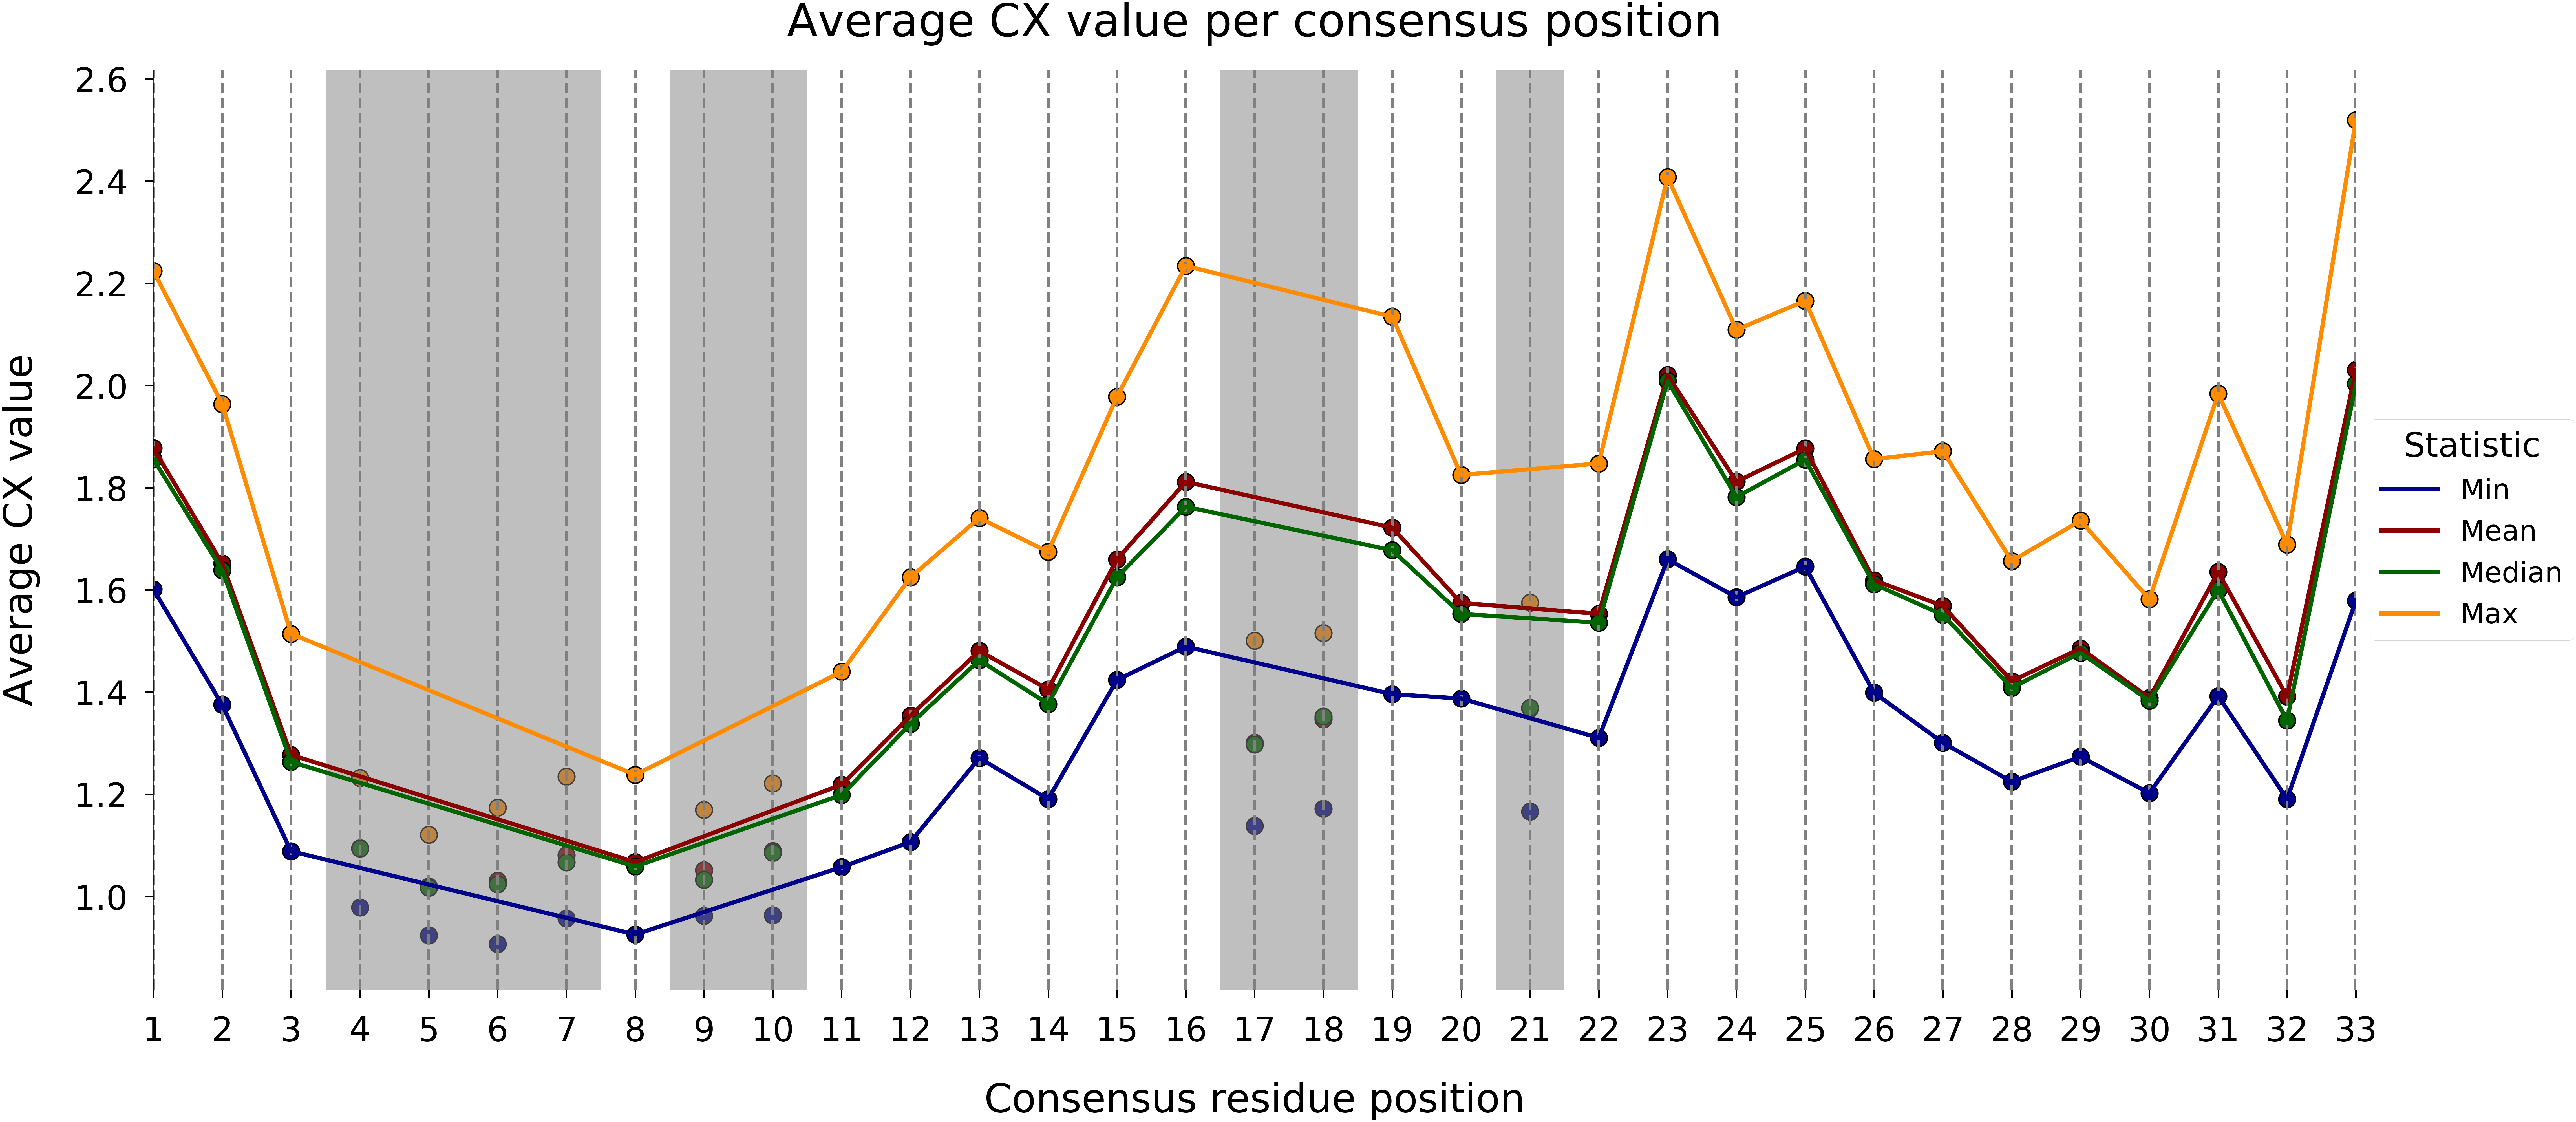

In [16]:
structural_analysis.plot_cx_consensus(cx_scores_df, buried_res, out = None)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
cx_scores_df.res_cx_median_mean.tolist()

[1.8556444072662288,
 1.6385603347838713,
 1.2633988954095108,
 1.0936899303602934,
 1.017189569190232,
 1.0236224422698628,
 1.0668161294186644,
 1.0586998012087252,
 1.032861497410483,
 1.0855043626881855,
 1.1987988269838774,
 1.3378335945682027,
 1.4624012088614085,
 1.376704868958227,
 1.6247295752771618,
 1.7626480204989154,
 1.2973004712773495,
 1.3521827476370345,
 1.677511070305326,
 1.5529549485217762,
 1.3691656327032462,
 1.5358104304255895,
 2.0087601843927163,
 1.7817356058583413,
 1.8548392288333935,
 1.6111786267115642,
 1.5511180651593688,
 1.4085203080993118,
 1.47702172223398,
 1.3829818443780488,
 1.599934885087955,
 1.3443930830019113,
 2.003275891749115]

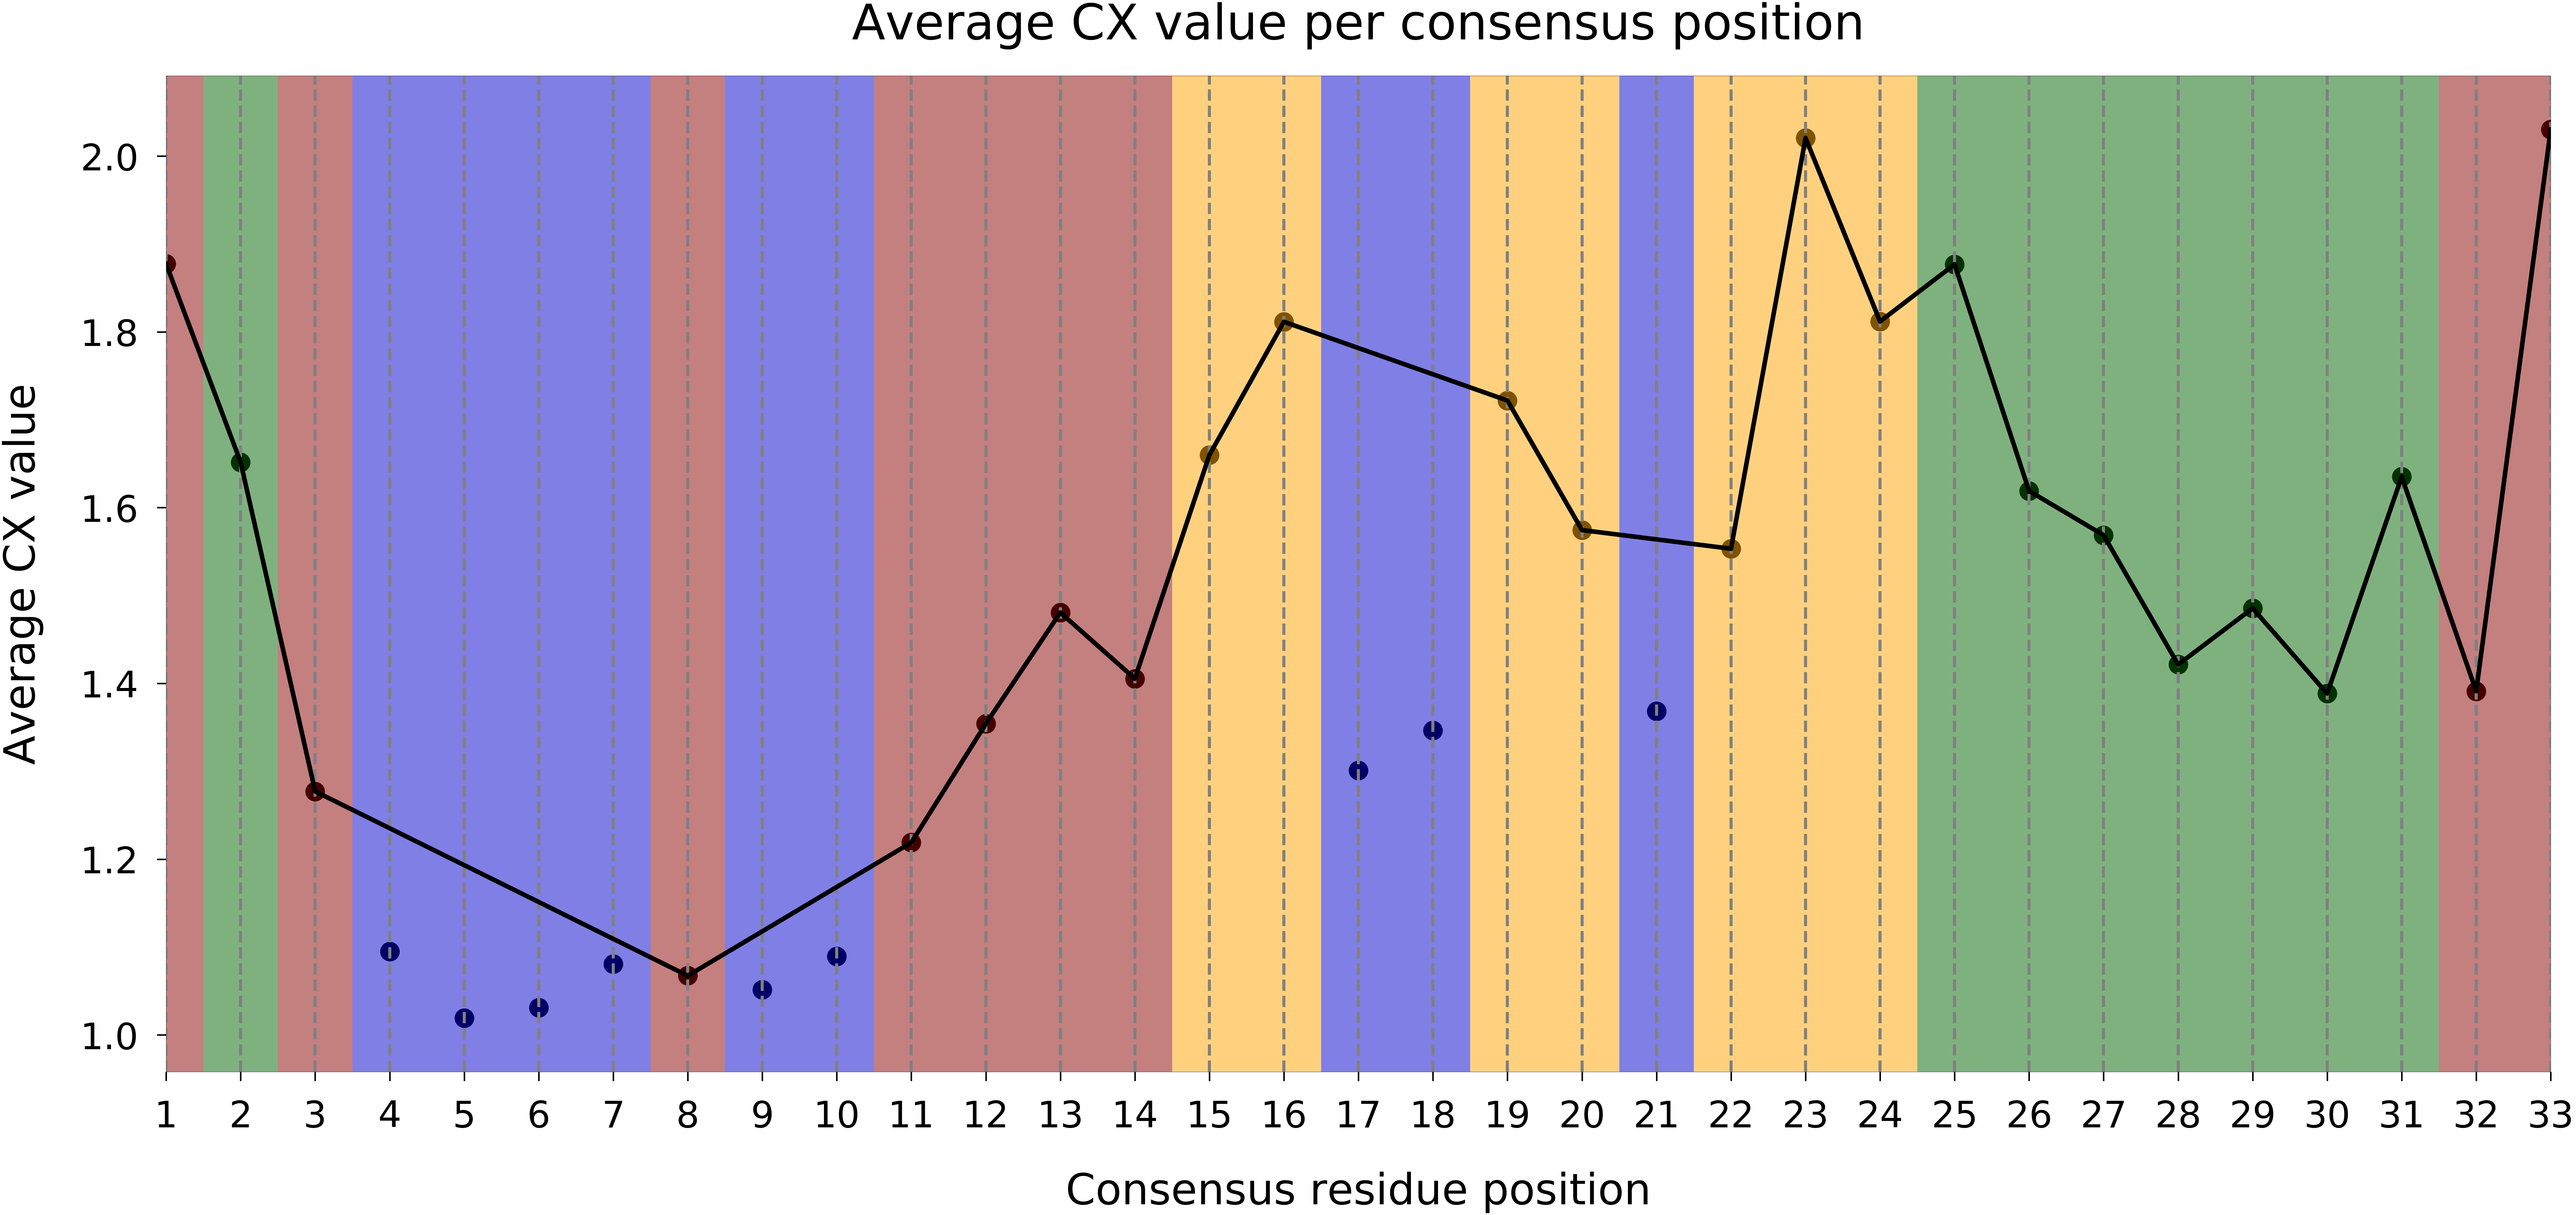

In [77]:
plot_cx_consensus2(cx_scores_df, buried_res, out = "/homes/2394007/figures/def/new_cx_cons.png")

In [76]:
def plot_cx_consensus2(df, buried_res, out = None):
    df_not_buried = df[~df.index.isin(buried_res)]
    n = len(df)
    plt.figure(figsize=(140,60))
    #plt.rcParams['axes.linewidth'] = 10
    for x in range(1,n+1):
        plt.axvline(x, linewidth = 10, color = 'grey',linestyle = '--')   
    plt.axvspan(1, 1.5, facecolor='darkred', alpha=0.5)
    plt.axvspan(1.5, 2.5, facecolor='darkgreen', alpha=0.5)
    plt.axvspan(2.5, 3.5, facecolor='darkred', alpha=0.5)
    plt.axvspan(3.5, 7.5, facecolor='mediumblue', alpha=0.5)
    plt.axvspan(7.5, 8.5, facecolor='darkred', alpha=0.5)
    plt.axvspan(8.5, 10.5, facecolor='mediumblue', alpha=0.5)
    plt.axvspan(10.5, 14.5, facecolor='darkred', alpha=0.5)
    plt.axvspan(14.5, 16.5, facecolor='orange', alpha=0.5)
    plt.axvspan(16.5, 18.5, facecolor='mediumblue', alpha=0.5)
    plt.axvspan(18.5, 20.5, facecolor='orange', alpha=0.5)
    plt.axvspan(20.5, 21.5, facecolor='mediumblue', alpha=0.5)
    plt.axvspan(21.5, 22.5, facecolor='orange', alpha=0.5)
    plt.axvspan(22.5, 24.5, facecolor='orange', alpha=0.5)
    plt.axvspan(24.5, 31.5, facecolor='darkgreen', alpha=0.5)
    plt.axvspan(31.5, 33, facecolor='darkred', alpha=0.5)
    #sns.lineplot(df_not_buried.index, df_not_buried.res_cx_min_mean, color = 'darkblue',linewidth = 15, label = 'Min')
    #sns.scatterplot(df.index, df.res_cx_min_mean, color = 'darkblue', s = 3500, edgecolor = 'black', linewidth = 5)
    sns.lineplot(df_not_buried.index, df_not_buried.res_cx_mean_mean, color = 'black',linewidth = 15)#, label = 'Mean')
    sns.scatterplot(df.index, df.res_cx_mean_mean, color = 'black', s = 3500, edgecolor = 'black', linewidth = 5)
    #sns.lineplot(df_not_buried.index, df_not_buried.res_cx_median_mean, color = 'darkgreen',linewidth = 15, label = 'Median')
    #sns.scatterplot(df.index, df.res_cx_median_mean, color = 'darkgreen', s = 3500, edgecolor = 'black', linewidth = 5)
    #sns.lineplot(df_not_buried.index, df_not_buried.res_cx_max_mean, color = 'darkorange',linewidth = 15, label = 'Max')
    #sns.scatterplot(df.index, df.res_cx_max_mean, color = 'darkorange', s = 3500, edgecolor = 'black', linewidth = 5)
    plt.title('Average CX value per consensus position', pad = 120, fontsize = 160)
    plt.xlabel('Consensus residue position', labelpad = 120, fontsize = 140)
    plt.ylabel('Average CX value', labelpad = 120, fontsize = 140)
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 100, title = 'Statistic', title_fontsize = 120)
    plt.tick_params(axis= 'both' , which = 'major', pad = 60, labelsize = 120,width = 5, length = 30)
    plt.xticks(np.arange(1,n+1,1))
    plt.xlim(1,n)
    if out != None:
        plt.savefig(out)
    plt.show()